#BERT


 بسم الله الرحمن الرحيم 

##Data Preprocessing


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/thesisDataset/newsDataset.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   25000 non-null  int64 
 1   name         25000 non-null  object
 2   url          25000 non-null  object
 3   title        25000 non-null  object
 4   article      25000 non-null  object
 5   kidFriendly  25000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
dataset

,Unnamed: 0,name,url,title,article,kidFriendly
0,0,Science News for Students,https://www.sciencenewsforstudents.org/article...,Cool Jobs: Sports science,A teenager wearing a white leotard emblazoned ...,1
1,1,ROBINAGE,https://www.robinage.com/books--nooks/dont-flu...,Don't Flush,If you think poo and wee is disgusting and not...,1
2,2,DOGO News,https://www.dogonews.com/2011/9/22/this-friday...,This Friday - Watch Out For The Satellite Debr...,"Over the years, we have sent so many irretriev...",1
3,3,Atlantic,Not Found,"Rex Tillerson Says Climate Change Is Real, but …","As chairman and CEO of ExxonMobil, Rex Tillers...",0
4,4,ROBINAGE,https://www.robinage.com/recipes/cheese-parant...,Cheese Parantha,What You Need: For the Parantha\nWheat flour -...,1
...,...,...,...,...,...,...
24995,24995,Time for Kids,http://tfk.news/3vpxnQR,It's #WafflesAndMochi day! TFK Kid Reporter Be...,"Take two puppets, add former First Lady Michel...",1
24996,24996,CNN,Not Found,Obama comes face to face with burdens of 9/11 ...,(CNN) President Barack Obama came face to fac...,0
24997,24997,Atlantic,Not Found,The New Reality TV,"“Reality seems tired. It seems derivative,” a ...",0
24998,24998,DOGO News,https://www.dogonews.com/2010/5/8/a-heavenly-t...,This Mother's Day - Reach For The Stars!,Photo Credit: imothersday.net If you are stil...,1


In [ ]:
dataset["name"].iloc[100]

'Science News for Students'

In [ ]:
dataset["url"].iloc[100]

'https://www.sciencenewsforstudents.org/article/parasite-may-help-mussels-survive-heat-waves'

In [ ]:
dataset["title"].iloc[100]

'Common parasite may help mussels survive heat waves'

In [ ]:
dataset["article"].iloc[100]

'parasit parasit answer provid benefit host consid microb long thought bring harm coastal mussel new research show may actual help host surviv danger heat wave call cyanobacteria sy oh bak teer ee uh bacteria bore mussel outer shell studi shown weaken mussel shell note kati nicastro marin biologist rhode univers south africa infest microb slow mussel growth reproduct even caus shell shed dark outer coat lighter color shell absorb less sunlight might keep host overh sunni day educ parent sign cheat sheet weekli updat help use scienc news student learn environ client key e mail address go thank sign problem sign nicastro teammat want know much heat protect microb might offer collect mussel europ retriev rocki shore northern portug mussel shell infest microb larg white patch non infest mussel normal dark shell research first remov mussel shell insert temperatur sensor insid shell place robomussel nine coastal site across europ northerli site orkney island north scotland southerli site por

In [ ]:
dataset["kidFriendly"].iloc[100]

1

##Data visualization

In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]

lifespan = [2, 8, 70, 1.5, 25, 12, 28]

index = ['snail', 'pig', 'elephant',

         'rabbit', 'giraffe', 'coyote', 'horse']

df = pd.DataFrame({'speed': speed,

                   'lifespan': lifespan}, index=index)

ax = df.plot.bar(rot=0)

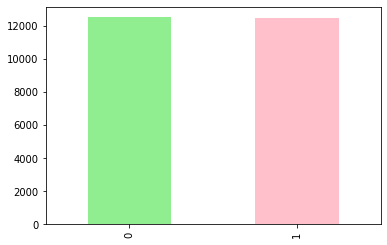

In [ ]:
dataset.kidFriendly.value_counts().plot.bar(color=['lightgreen', 'pink'])

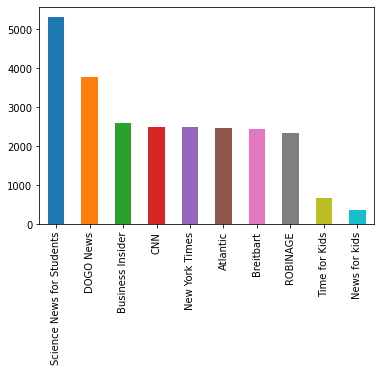

In [ ]:
dataset.name.value_counts().plot.bar(color=['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'])

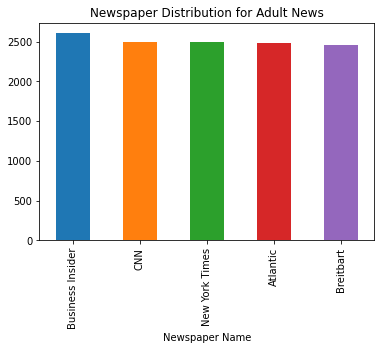

In [ ]:
temp = dataset.query('kidFriendly == 0')
temp.name.value_counts().plot.bar(color=['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'],title='Newspaper Distribution for Adult News', xlabel='Newspaper Name')

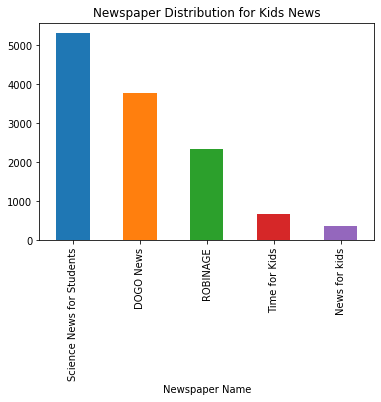

In [ ]:
temp2 = dataset.query('kidFriendly == 1')
temp2.name.value_counts().plot.bar(color=['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'],title='Newspaper Distribution for Kids News', xlabel='Newspaper Name')

In [ ]:
ind = dataset.index[dataset['article'].apply(lambda x: len(str(x).split())) <50 ]

In [ ]:
dataset.loc[12389]

Unnamed: 0                                                 12389
name                                            Business Insider
url                                                    Not Found
title          Hillary Clinton wins Puerto Rico Democratic pr...
article        ’’ ”SAN JUAN, Puerto Rico (AP)    Hillary Clin...
kidFriendly                                                    0
Name: 12389, dtype: object

In [ ]:
ind

Int64Index([], dtype='int64')

In [ ]:
article_len = dataset['article'].astype(str).apply(len)
word_count = dataset['article'].apply(lambda x: len(str(x).split()))

In [ ]:
article_len1 = temp['article'].astype(str).apply(len)
word_count1 = temp['article'].apply(lambda x: len(str(x).split()))

In [ ]:
article_len2 = temp2['article'].astype(str).apply(len)
word_count2 = temp2['article'].apply(lambda x: len(str(x).split()))

In [ ]:
print(min(article_len1))
print(max(article_len1))
print(min(word_count1))
print(max(word_count1))

print(min(article_len2))
print(max(article_len2))
print(min(word_count2))
print(max(word_count2))

507
74920
100
9639
504
29735
100
5249


In [ ]:
dataset = dataset.dropna(subset=['article'])

In [ ]:
dataset.loc[758].article

'An Arizona Republican senator, who was most adamantly opposed to   Donald J. Trump, is in for a tough reelection campaign in 2018, according to a Remington Research Group poll. The poll was conducted Nov. 15 and Nov. 16 with 1, 122 likely Republican primary voters in that state and carries a 2. 93 percent margin of error. [“Jeff Flake is currently in a very precarious position,” said Titus Bond, director of Remington Research Group. “The data show that Flake’s image amongst Republican primary voters is in bad shape and that carries over to the ballot where he only realizes 35 percent support on the high end. It remains early but he is certainly the most vulnerable incumbent to a primary challenge. ”  The data show that Donald Trump is popular amongst Arizona’s Republican primary electorate.   percent hold a favorable view of the   while only 10 percent view him unfavorably, Bond said. Flake is viewed unfavorably by roughly half of Republicans. Thirty percent view Flake favorably, whil

In [ ]:
dataset.query('article == ""')

,Unnamed: 0,name,url,title,article,kidFriendly


In [ ]:
article_len

0        13915
1         1243
2         1838
3         5784
4          878
         ...  
24995      744
24996     7810
24997     7606
24998     1233
24999     2898
Name: article, Length: 25000, dtype: int64

In [ ]:
word_count

0        2353
1         207
2         311
3         965
4         154
         ... 
24995     119
24996    1355
24997    1287
24998     211
24999     459
Name: article, Length: 25000, dtype: int64

In [ ]:
min(article_len)

504

In [ ]:
max(article_len)

74920

In [ ]:
min(word_count)

100

In [ ]:
max(word_count)

9639

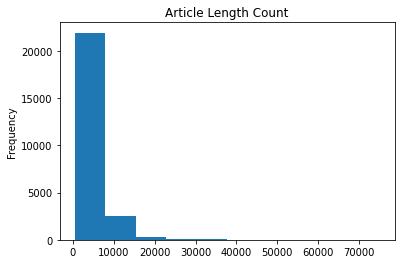

In [ ]:
article_len.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

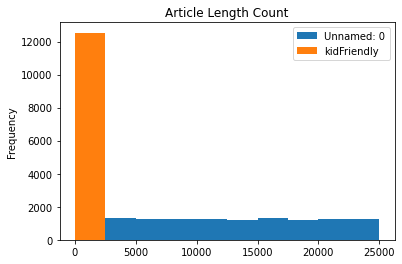

In [ ]:
temp.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

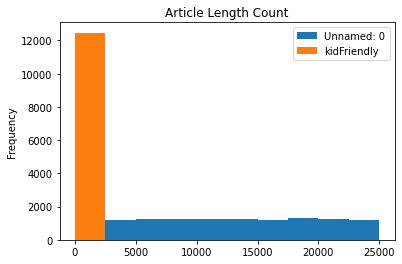

In [ ]:
temp2.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

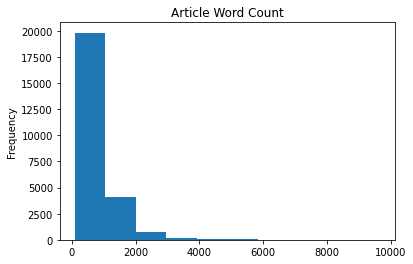

In [ ]:
word_count.plot(
    kind = 'hist',
    xlabel = 'word_count',
    ylabel = 'count',
    title='Article Word Count')

##NLP

In [ ]:
X =  dataset.iloc[:, 4].values
y = dataset.iloc[:, 5].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.20, random_state=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_test, X_valid, y_test, y_valid  = train_test_split(X_test, y_test, test_size=0.50, random_state=1) 

In [ ]:
X_train.shape

(20000,)

In [ ]:
X_test.shape

(2500,)

In [ ]:
X_valid.shape

(2500,)

##BERT

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 7.5 MB/s 


In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.2 MB/s 


In [ ]:
import tensorflow
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.layers import Dense, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tensorflow.keras.layers.Input(shape=(), dtype=tensorflow.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
l = tensorflow.keras.layers.Dropout(0.01, name="dropout")(outputs['pooled_output'])
l = tensorflow.keras.layers.Dense(128, activation='sigmoid', name="hidden1")(l)
l = tensorflow.keras.layers.Dense(32, activation='sigmoid', name="hidden2")(l)
l = tensorflow.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [ ]:
model = tensorflow.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
optimizer = Adam(learning_rate=3e-4)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 5, 
                                        restore_best_weights = True)

##Random state = 100 with callback

In [ ]:
history = model.fit(
    X_train, y_train, epochs=11, validation_data=(X_valid, y_valid),callbacks = [earlystopping]
)

Epoch 1/11
625/625 [==============================] - 271s 415ms/step - loss: 0.3612 - accuracy: 0.8552 - val_loss: 0.2116 - val_accuracy: 0.9292
Epoch 2/11
625/625 [==============================] - 263s 421ms/step - loss: 0.1836 - accuracy: 0.9315 - val_loss: 0.1751 - val_accuracy: 0.9320
Epoch 3/11
625/625 [==============================] - 263s 421ms/step - loss: 0.1619 - accuracy: 0.9383 - val_loss: 0.1478 - val_accuracy: 0.9440
Epoch 4/11
625/625 [==============================] - 263s 421ms/step - loss: 0.1490 - accuracy: 0.9444 - val_loss: 0.1420 - val_accuracy: 0.9456
Epoch 5/11
625/625 [==============================] - 263s 420ms/step - loss: 0.1438 - accuracy: 0.9461 - val_loss: 0.1495 - val_accuracy: 0.9416
Epoch 6/11
625/625 [==============================] - 263s 420ms/step - loss: 0.1367 - accuracy: 0.9486 - val_loss: 0.1299 - val_accuracy: 0.9532
Epoch 7/11
625/625 [==============================] - 263s 420ms/step - loss: 0.1383 - accuracy: 0.9473 - val_loss: 0.1367 -

##Train VS Validation

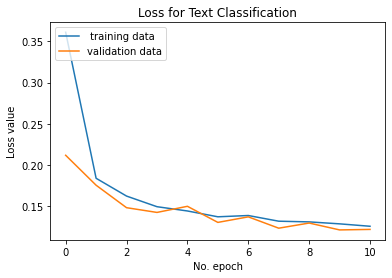

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

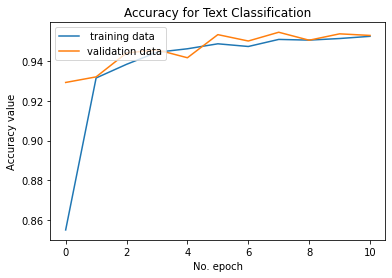

In [ ]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

##Depictions


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

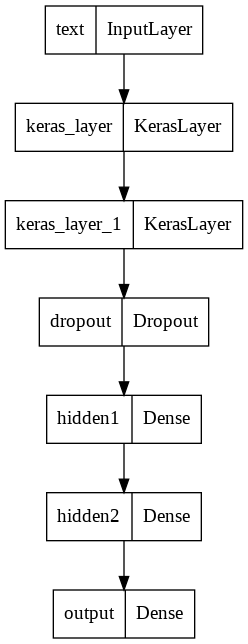

In [ ]:
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png")

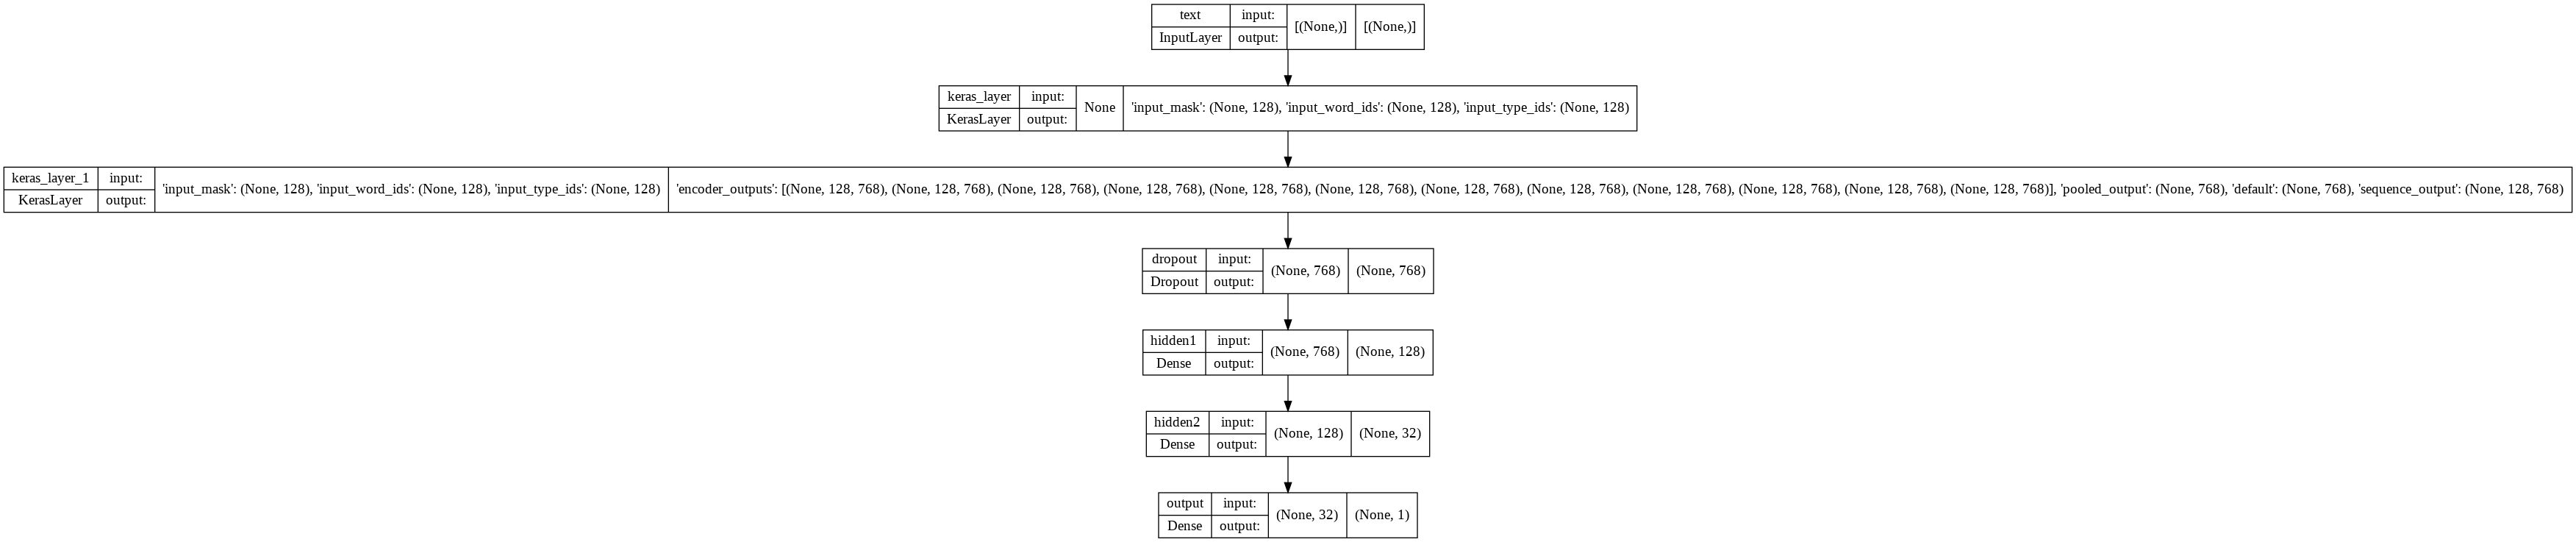

In [ ]:
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

##Evaluation

In [ ]:
results0 = model.evaluate(X_train,y_train)

625/625 [==============================] - 240s 384ms/step - loss: 0.1212 - accuracy: 0.9566


In [ ]:
results = model.evaluate(X_test,y_test)

79/79 [==============================] - 29s 369ms/step - loss: 0.1221 - accuracy: 0.9568


In [ ]:
results2 = model.evaluate(X_valid,y_valid)

79/79 [==============================] - 29s 369ms/step - loss: 0.1214 - accuracy: 0.9528


In [ ]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0.06 0.68 0.01 ... 0.01 0.   0.55]
[0 1 0 ... 0 0 1]


In [ ]:
p_pred2 = model.predict(X_valid)
p_pred2 = p_pred2.flatten()
print(p_pred2.round(2))
# extract the predicted class labels
y_pred2 = np.where(p_pred2 > 0.5, 1, 0)
print(y_pred2)

[0.   0.35 0.99 ... 0.   0.11 0.96]
[0 0 1 ... 0 0 1]


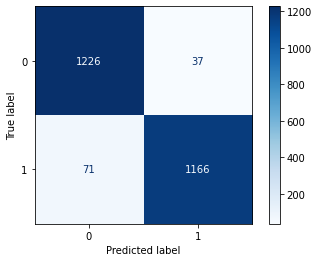

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

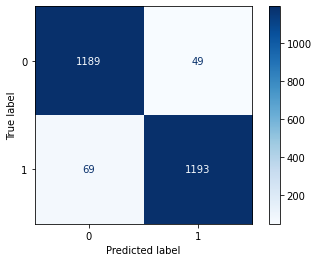

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm2 = confusion_matrix(y_valid, y_pred2)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

disp2.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1263
           1       0.97      0.94      0.96      1237

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



In [ ]:
from sklearn.metrics import classification_report
report2 = classification_report(y_valid, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1238
           1       0.96      0.95      0.95      1262

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500

